# <center>TCGA-LUAD</center>

## Abstract 

## Main Code

In [91]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

In [37]:
# Opening the dataset
df = pd.read_table("processed_squamous.txt", sep=" ")
y = df.label
X = df.drop('label', axis=1) #iloc[:,list(range(df.shape[1]-1))]
# features in columns and samples in rows.

In [35]:
print(df.shape)
print(x.shape)
print(y.shape)
y.describe()

(551, 917)
(551, 916)
(551,)


count       551
unique        2
top       tumor
freq        502
Name: label, dtype: object

In [111]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(440, 915)
(440,)
(111, 915)
(111,)


### Model #1: SVM

In [113]:
# SVM model (building the model [Linear])
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
# testing the model
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 10   0]
 [  1 100]]
              precision    recall  f1-score   support

      Normal       0.91      1.00      0.95        10
       tumor       1.00      0.99      1.00       101

   micro avg       0.99      0.99      0.99       111
   macro avg       0.95      1.00      0.97       111
weighted avg       0.99      0.99      0.99       111

0.990990990990991


In [89]:
# GridSearch
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
# {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = GridSearchCV(svclassifier, parameters)
grid.fit(X_train, y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_) 
y_pred_2 = grid.predict(X_test)
print(confusion_matrix(y_test,y_pred_2))
print(classification_report(y_test,y_pred_2))
print(accuracy_score(y_test,y_pred_2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[  8   2]
 [  1 100]]
              precision    recall  f1-score   support

      Normal       0.89      0.80      0.84        10
       tumor       0.98      0.99      0.99       101

   micro avg       0.97      0.97      0.97       111
   macro avg       0.93      0.90      0.91       111
weighted avg       0.97      0.97      0.97       111

0.972972972972973


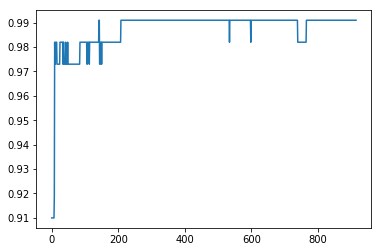

In [90]:
# No. of features vs. accuracy
acc_list = []
for i in range(1, df.shape[1]-1):
    X = df.iloc[:,list(range(i))]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(acc_list)
plt.show()

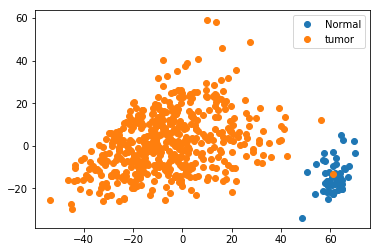

In [107]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0],X_pca[:,1])

df2 = pd.DataFrame(dict(x=X_pca[:,0], y=X_pca[:,1], label=y))

groups = df2.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

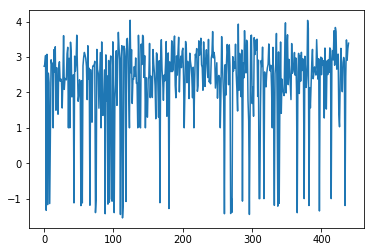

In [115]:
plt.plot(svclassifier.decision_function(X_train))

## Results and Discussion